In [27]:
import pandas as pd

ratings = pd.read_csv('u.data', sep='\t', names=['user_id','movie_id','rating','timestamp'])
movies = pd.read_csv('u.item', sep='|', encoding='latin-1', header=None)


In [28]:
print(ratings.head())
print(movies.head())

   user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596
   0                  1            2   3   \
0   1   Toy Story (1995)  01-Jan-1995 NaN   
1   2   GoldenEye (1995)  01-Jan-1995 NaN   
2   3  Four Rooms (1995)  01-Jan-1995 NaN   
3   4  Get Shorty (1995)  01-Jan-1995 NaN   
4   5     Copycat (1995)  01-Jan-1995 NaN   

                                                  4   5   6   7   8   9   ...  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...   0   0   0   1   1  ...   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...   0   1   1   0   0  ...   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...   0   0   0   0   0  ...   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...   0   1   0   0   0  ...   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)   0   0   0   0   0  ...   

  

In [29]:

print(movies.head())
print("Number of columns:", movies.shape[1])

   0                  1            2   3   \
0   1   Toy Story (1995)  01-Jan-1995 NaN   
1   2   GoldenEye (1995)  01-Jan-1995 NaN   
2   3  Four Rooms (1995)  01-Jan-1995 NaN   
3   4  Get Shorty (1995)  01-Jan-1995 NaN   
4   5     Copycat (1995)  01-Jan-1995 NaN   

                                                  4   5   6   7   8   9   ...  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...   0   0   0   1   1  ...   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...   0   1   1   0   0  ...   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...   0   0   0   0   0  ...   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...   0   1   0   0   0  ...   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)   0   0   0   0   0  ...   

   14  15  16  17  18  19  20  21  22  23  
0   0   0   0   0   0   0   0   0   0   0  
1   0   0   0   0   0   0   0   1   0   0  
2   0   0   0   0   0   0   0   1   0   0  
3   0   0   0   0   0   0   0   0   0   0  
4   0   0   0   0   0 

In [30]:
# 3️⃣ Name first few columns, ignore detailed genre columns for simplicity
movies.columns = ['movie_id','title','release_date','video_release','IMDb_URL'] + ['genre_'+str(i) for i in range(19)]

# 4️⃣ Combine all genre flags into a single string manually
genre_text = []
for i in range(len(movies)):
    genres = ''
    for j in range(5,24):  # columns 5 to 23 are genre flags
        genres += str(movies.iloc[i,j]) + ' '
    genre_text.append(genres.strip())

movies['genres'] = genre_text

# 5️⃣ Create combined column (title + genres)
movies['combined'] = movies['title'] + " " + movies['genres']

print(movies.head())
print(movies.info())

   movie_id              title release_date  video_release  \
0         1   Toy Story (1995)  01-Jan-1995            NaN   
1         2   GoldenEye (1995)  01-Jan-1995            NaN   
2         3  Four Rooms (1995)  01-Jan-1995            NaN   
3         4  Get Shorty (1995)  01-Jan-1995            NaN   
4         5     Copycat (1995)  01-Jan-1995            NaN   

                                            IMDb_URL  genre_0  genre_1  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0        0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0        1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0        0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0        1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0        0   

   genre_2  genre_3  genre_4  ...  genre_11  genre_12  genre_13  genre_14  \
0        0        1        1  ...         0         0         0         0   
1        1        0        0

In [31]:
# ✅ Show first 5 rows
print("📌 First 5 Rows:")
print(movies.head())

📌 First 5 Rows:
   movie_id              title release_date  video_release  \
0         1   Toy Story (1995)  01-Jan-1995            NaN   
1         2   GoldenEye (1995)  01-Jan-1995            NaN   
2         3  Four Rooms (1995)  01-Jan-1995            NaN   
3         4  Get Shorty (1995)  01-Jan-1995            NaN   
4         5     Copycat (1995)  01-Jan-1995            NaN   

                                            IMDb_URL  genre_0  genre_1  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0        0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0        1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0        0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0        1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0        0   

   genre_2  genre_3  genre_4  ...  genre_11  genre_12  genre_13  genre_14  \
0        0        1        1  ...         0         0         0         0   
1        1  

In [32]:
# ✅ Dataset shape
print("\n📌 Dataset Shape (rows, columns):")
print(movies.shape)


📌 Dataset Shape (rows, columns):
(1682, 26)


In [33]:
# ✅ Check column names
print("\n📌 Column Names:")
print(movies.columns)


📌 Column Names:
Index(['movie_id', 'title', 'release_date', 'video_release', 'IMDb_URL',
       'genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5',
       'genre_6', 'genre_7', 'genre_8', 'genre_9', 'genre_10', 'genre_11',
       'genre_12', 'genre_13', 'genre_14', 'genre_15', 'genre_16', 'genre_17',
       'genre_18', 'genres', 'combined'],
      dtype='object')


In [34]:
# ✅ Check data types
print("\n📌 Data Types:")
print(movies.dtypes)


📌 Data Types:
movie_id           int64
title             object
release_date      object
video_release    float64
IMDb_URL          object
genre_0            int64
genre_1            int64
genre_2            int64
genre_3            int64
genre_4            int64
genre_5            int64
genre_6            int64
genre_7            int64
genre_8            int64
genre_9            int64
genre_10           int64
genre_11           int64
genre_12           int64
genre_13           int64
genre_14           int64
genre_15           int64
genre_16           int64
genre_17           int64
genre_18           int64
genres            object
combined          object
dtype: object


In [35]:
# ✅ Count missing values
print("\n📌 Missing Values:")
print(movies.isnull().sum())


📌 Missing Values:
movie_id            0
title               0
release_date        1
video_release    1682
IMDb_URL            3
genre_0             0
genre_1             0
genre_2             0
genre_3             0
genre_4             0
genre_5             0
genre_6             0
genre_7             0
genre_8             0
genre_9             0
genre_10            0
genre_11            0
genre_12            0
genre_13            0
genre_14            0
genre_15            0
genre_16            0
genre_17            0
genre_18            0
genres              0
combined            0
dtype: int64


In [36]:
# ✅ Check unique genres count
print("\n📌 Unique Genres Count:")
print(movies['genres'].nunique())


📌 Unique Genres Count:
216


In [37]:
# ✅ List of unique genres
print("\n📌 Unique Genres:")
print(movies['genres'].unique()[:20])  # show first 20


📌 Unique Genres:
['0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0'
 '0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0'
 '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0'
 '0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0'
 '0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0'
 '0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0'
 '0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0'
 '0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0'
 '0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0'
 '0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0'
 '0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0'
 '0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0'
 '0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0'
 '0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0'
 '0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0'
 '0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0'
 '0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0'
 '0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0'
 '0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0'
 '0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0']


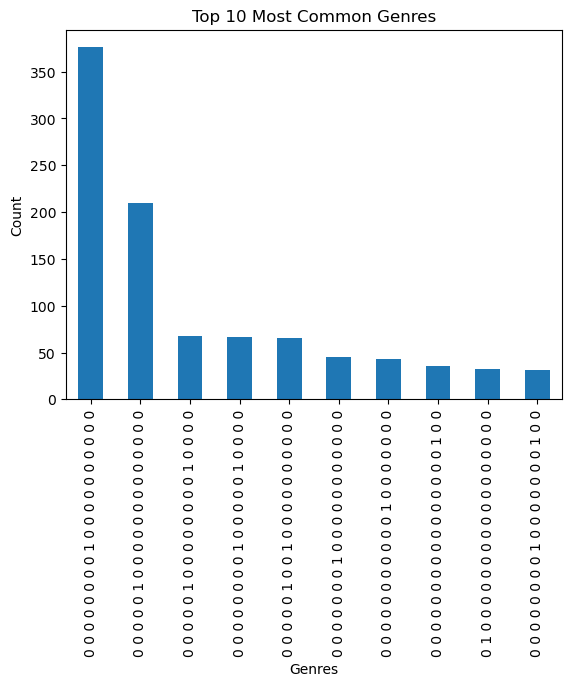

In [38]:
# ✅ Most common genres (bar chart)
plt.figure()
movies['genres'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Most Common Genres")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.show()

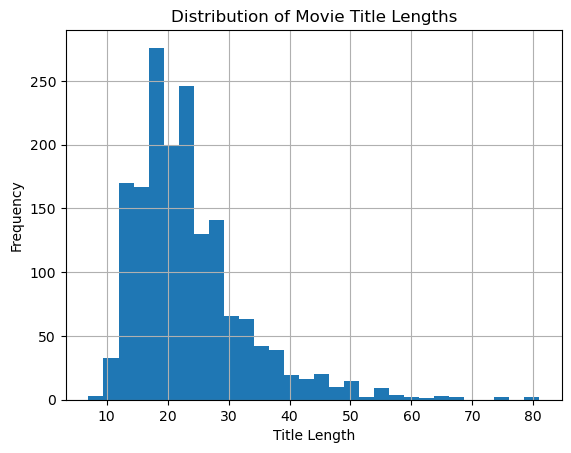

In [39]:
# ✅ Movie title length analysis
movies['title_length'] = movies['title'].astype(str).apply(len)

plt.figure()
movies['title_length'].hist(bins=30)
plt.title("Distribution of Movie Title Lengths")
plt.xlabel("Title Length")
plt.ylabel("Frequency")
plt.show()

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import NearestNeighbors
cv = CountVectorizer()
count_matrix = cv.fit_transform(movies['combined'])

# Fit KNN model
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(count_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [15]:
def recommend_knn(movie_name, n_recommendations=5):
    # Find the index of the movie
    idx = movies[movies['title'].str.contains(movie_name, case=False)].index[0]
    
    # Find nearest neighbors
    distances, indices = knn.kneighbors(count_matrix[idx], n_neighbors=n_recommendations+1)
    
    # Get recommended movie titles (skip the first one because it's the same movie)
    recommended_movies = []
    for i in indices[0][1:]:
        recommended_movies.append(movies.iloc[i]['title'])
    
    return recommended_movies


In [16]:
print(recommend_knn("Toy Story"))

["Pyromaniac's Love Story, A (1995)", 'Mirage (1995)', 'GoldenEye (1995)', 'Angela (1995)', 'Restoration (1995)']
